## MPU6050  
6-axis Gyro and Accelerometer  

Manufacturer Link:  https://www.invensense.com/products/motion-tracking/6-axis/mpu-6050/

Breakout Board Link:  https://www.sparkfun.com/products/11028

In [1]:
import smbus
import matplotlib.pyplot as plt

from meerkat import mpu6050, parser

In [2]:
dev = mpu6050.mpu6050(bus_n=1, output='json')

#### Configuration

In [3]:
dev.set_gyro_range(dev.GYRO_RANGE_1000DEG)
dev.set_accel_range(dev.ACCEL_RANGE_2G)

#### Measurements

In [4]:
dev.get_temp()

24.671176470588236

In [5]:
dev.get_accel()

(30.24834377441406, 38.31440916748047, 36.58818977050781)

In [6]:
dev.get_gyro()

(-5.916030534351145, 0.8320610687022901, -0.8396946564885496)

In [7]:
dev.get_all()

[24.624117647058824,
 30.29862200927734,
 38.386235217285154,
 36.545094140625,
 -5.816793893129771,
 -0.007633587786259542,
 -0.9618320610687023]

In [8]:
dev.get()

['NA',
 1,
 30.205248144531247,
 38.30483236083984,
 36.74620708007812,
 -5.824427480916031,
 0.9923664122137404,
 -1.0687022900763359]

In [9]:
dev.get(description="test_1", n=5)

[['test_1',
  1,
  30.22200755615234,
  38.352716394042965,
  36.631285400390624,
  -5.755725190839694,
  0.08396946564885496,
  -1.0534351145038168],
 ['test_1',
  2,
  30.21721915283203,
  38.264130932617185,
  36.631285400390624,
  -5.755725190839694,
  0.09923664122137404,
  -0.9236641221374046],
 ['test_1',
  3,
  30.212430749511718,
  38.37187000732422,
  36.633679602050776,
  -5.770992366412214,
  0.1450381679389313,
  -0.9923664122137404],
 ['test_1',
  4,
  30.284256799316406,
  38.30483236083984,
  36.68874624023437,
  -5.755725190839694,
  0.5267175572519084,
  -1.1068702290076335],
 ['test_1',
  5,
  30.255526379394528,
  38.36229320068359,
  36.597766577148434,
  -5.793893129770993,
  0.7251908396946565,
  -1.015267175572519]]

#### JSON Data Publishing

In [10]:
# lower metadata interval from a default of once every 10 samples
dev.json_writer.metadata_interval = 3

In [11]:
# writing method with description and sample number
dev.publish(description='test_2', n=5)

['{"description": "test_2", "sample_n": 0, "ax": 30.23637276611328, "ay": 38.321591772460934, "az": 36.57861296386719, "gx": -5.824427480916031, "gy": 0.2824427480916031, "gz": -1.0763358778625953, "std_time_ms": "2020-12-08 13:54:33.356732"}',
 '{"description": "test_2", "sample_n": 1, "ax": 30.26749738769531, "ay": 38.30962076416015, "az": 36.6815636352539, "gx": -5.854961832061068, "gy": 0.5419847328244275, "gz": -0.8702290076335878, "std_time_ms": "2020-12-08 13:54:33.362457"}',
 '{"description": "test_2", "sample_n": 2, "ax": 30.212430749511718, "ay": 38.34074538574219, "az": 36.56185355224609, "gx": -5.427480916030534, "gy": 0.816793893129771, "gz": -0.916030534351145, "std_time_ms": "2020-12-08 13:54:33.368218", "encoding": "utf-8", "format": "text/json", "standard": "RFC 8259", "line_terminator": "\\n", "quote_char": "\\"", "double_quote": true, "escape_char": "\\\\", "null_sequence": "NA", "comment": "#", "metadata": {"name": "MPU6050", "urls": "https://www.invensense.com/prod

#### JSON Writer Output

In [12]:
# default writer format is CSV, switch to JSON
dev.writer_output = 'json'

In [13]:
# writer method with description and sample number
dev.write(description='test_3', n=30)

In [14]:
dev.json_writer.path

'2020_12_08_13_54_33_mpu6050.jsontxt'

In [15]:
with open(dev.json_writer.path, 'r') as f:
    for _ in range(4):
        print(f.readline().strip())

{"description": "test_3", "sample_n": 0, "ax": 30.255526379394528, "ay": 38.321591772460934, "az": 36.68874624023437, "gx": -5.709923664122138, "gy": 0.4580152671755725, "gz": -0.9694656488549618, "std_time_ms": "2020-12-08 13:54:33.421421"}
{"description": "test_3", "sample_n": 1, "ax": 30.277074194335935, "ay": 38.28567874755859, "az": 36.60973758544922, "gx": -5.580152671755725, "gy": 0.5190839694656488, "gz": -0.9541984732824428, "std_time_ms": "2020-12-08 13:54:33.427128"}
{"description": "test_3", "sample_n": 2, "ax": 30.281862597656247, "ay": 38.295255554199215, "az": 36.71508245849609, "gx": -5.587786259541985, "gy": 0.10687022900763359, "gz": -1.015267175572519, "std_time_ms": "2020-12-08 13:54:33.432553", "encoding": "utf-8", "format": "text/json", "standard": "RFC 8259", "line_terminator": "\n", "quote_char": "\"", "double_quote": true, "escape_char": "\\", "null_sequence": "NA", "comment": "#", "metadata": {"name": "MPU6050", "urls": "https://www.invensense.com/products/mot

#### CSV Writer Output

In [16]:
# switch back to CSV format
dev.writer_output = 'csv'

In [17]:
# writer method with description and sample number
dev.write(description='test_4', n=30)

In [18]:
dev.csv_writer.path

'2020_12_08_13_54_33_mpu6050.csv'

In [19]:
# load .csv data written with dev.write
m, df = parser.csv_resource(dev.csv_writer.path)

#### Metadata in CSV

In [20]:
m

{'case_sensitive_header': False,
 'comment': '#',
 'delimiter': ',',
 'double_quote': True,
 'encoding': 'utf-8',
 'escape_char': '\\',
 'format': 'text/csv',
 'line_terminator': '\n',
 'metadata': {'accel_accuracy': '+/-0.5%, +/-2 cross axis',
  'accel_noise': 'PSD 400 ug / Hz**1/2',
  'accel_precision': '16bit',
  'accuracy': [None, 1, '+/-3%', '+/-3%', '+/-3%', '+/-3%', '+/-3%', '+/-3%'],
  'accuracy_precision_note': 'See datasheet for scale factor dependent accuracy & LSB precision',
  'bus_addr': 104,
  'bus_n': 1,
  'description': 'TDK InvenSense Gyro & Accelerometer',
  'dtype': ['str',
   'int',
   'float',
   'float',
   'float',
   'float',
   'float',
   'float'],
  'gyro_accuracy': '+/-3%, +/-2% cross axis',
  'gyro_noise': '0.05 deg/s-rms',
  'gyro_precision': '16bit',
  'header': ['description', 'sample_n', 'ax', 'ay', 'az', 'gx', 'gy', 'gz'],
  'manufacturer': 'Adafruit Industries & TDK',
  'name': 'MPU6050',
  'units': [None, 'count', 'g', 'g', 'g', 'deg/s', 'deg/s', 'd

#### Parsed CSV data

In [21]:
df.head()

,std_time_ms,description,sample_n,ax,ay,az,gx,gy,gz,datetime64_ns
0,2020-12-08 13:54:33.641579,test_4,0,30.214825,38.335957,36.614526,-5.770992,0.938931,-0.694656,2020-12-08 13:54:33.641579
1,2020-12-08 13:54:33.647107,test_4,1,30.269892,38.352716,36.561854,-5.687023,0.832061,-0.839695,2020-12-08 13:54:33.647107
2,2020-12-08 13:54:33.669353,test_4,2,30.241161,38.252160,36.626497,-5.595420,-0.061069,-1.183206,2020-12-08 13:54:33.669353
3,2020-12-08 13:54:33.674747,test_4,3,30.301016,38.285679,36.667198,-5.847328,0.458015,-0.916031,2020-12-08 13:54:33.674747
4,2020-12-08 13:54:33.679979,test_4,4,30.289045,38.312015,36.597767,-5.679389,0.580153,-0.870229,2020-12-08 13:54:33.679979


In [22]:
# Pandas 0.24.1 hack
df.datetime64_ns = df.datetime64_ns.dt.tz_localize('UTC')

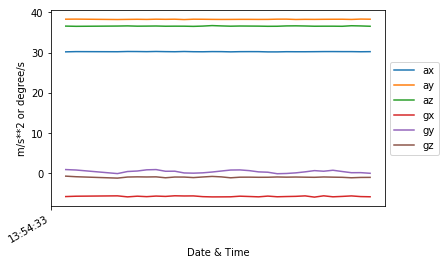

In [23]:
df[['datetime64_ns', 
    'ax', 'ay', 'az', 
    'gx', 'gy', 'gz']].plot(x='datetime64_ns');
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.xlabel('Date & Time');
plt.ylabel('m/s**2 or degree/s');